In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import glob
import os
import pandas as pd
import japanize_matplotlib
from matplotlib import patches
import seaborn as sns
import json #標準のjsonモジュールの読み込み
from requests_oauthlib import OAuth1Session #OAuthのライブラリの読み込み

In [5]:
#API_Key(CONSUMER_KEY), API_Key_Secret(CONSUMER_SECRET), ACCESS_TOKEN, ACCESS_TOKEN_SECRET
APIK = 'bcC9s6V0E0A1rsgRbKjxGYuq4'
APIKS = 'a8ikXFd7Vg3ALhk1sddhH9u638Te6g5ry5KdTja12FXTrniPEL'
AT = '1387217698644381697-xcZwmI0JAcYkwOlSg4zipjdXhZHBwc'
ATS = 'SGv0fTIpLZumOtsnxkXAp62L9UbcYe6kUhCx09nWHXSd9'

url_media = "https://upload.twitter.com/1.1/media/upload.json"
url_text = "https://api.twitter.com/1.1/statuses/update.json"

#定数類
guide_c = 'grey'
strike_c = 'r'
strike_z_c = 'silver'
Column_labels = ["何球目","投手",'左右投',"球種","球速","結果",]
hand_R = [[0,'o'],[1,'D'],[2,'<'],[3,'$↙$'],[4,'v'],[5,'$➘$'],[6,'>']]
hand_L = [[0,'o'],[1,'D'],[2,'>'],[3,'$➘$'],[4,'v'],[5,'$↙$'],[6,'<']]

Contact = [[0,'darkblue'],[1,'yellow'],[2,'orangered']]



Team = 'ヤクルト'
file_savepath = 'エクセルファイル/全試合元データ/図用'
file_loadpath = 'エクセルファイル/全試合元データ/図用/*.xlsx'

11人
1人目OK
2人目OK
3人目OK
4人目OK
5人目OK
6人目OK
7人目OK
8人目OK


<ipython-input-6-5e4c0c1a3dfc>:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(x=value, autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 15},pctdistance=0.75)


9人目OK


<ipython-input-6-5e4c0c1a3dfc>:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(x=value, autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 15},pctdistance=0.75)


10人目OK


<ipython-input-6-5e4c0c1a3dfc>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 15))
<ipython-input-6-5e4c0c1a3dfc>:42: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(x=value, autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 15},pctdistance=0.75)


11人目OK


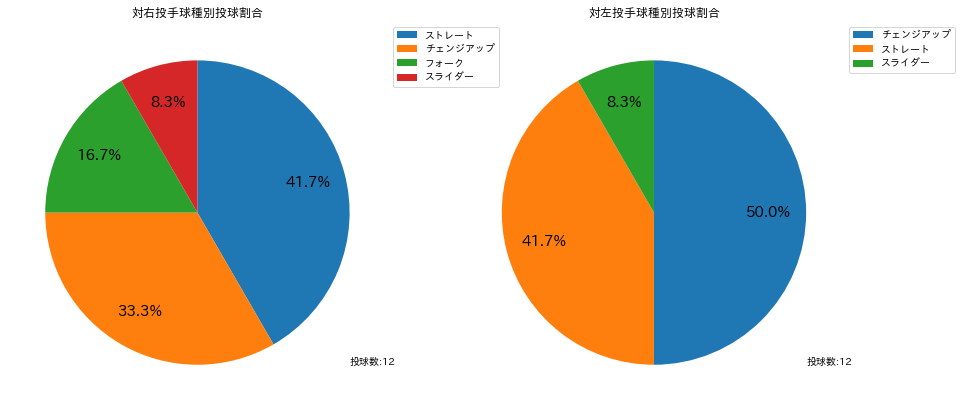

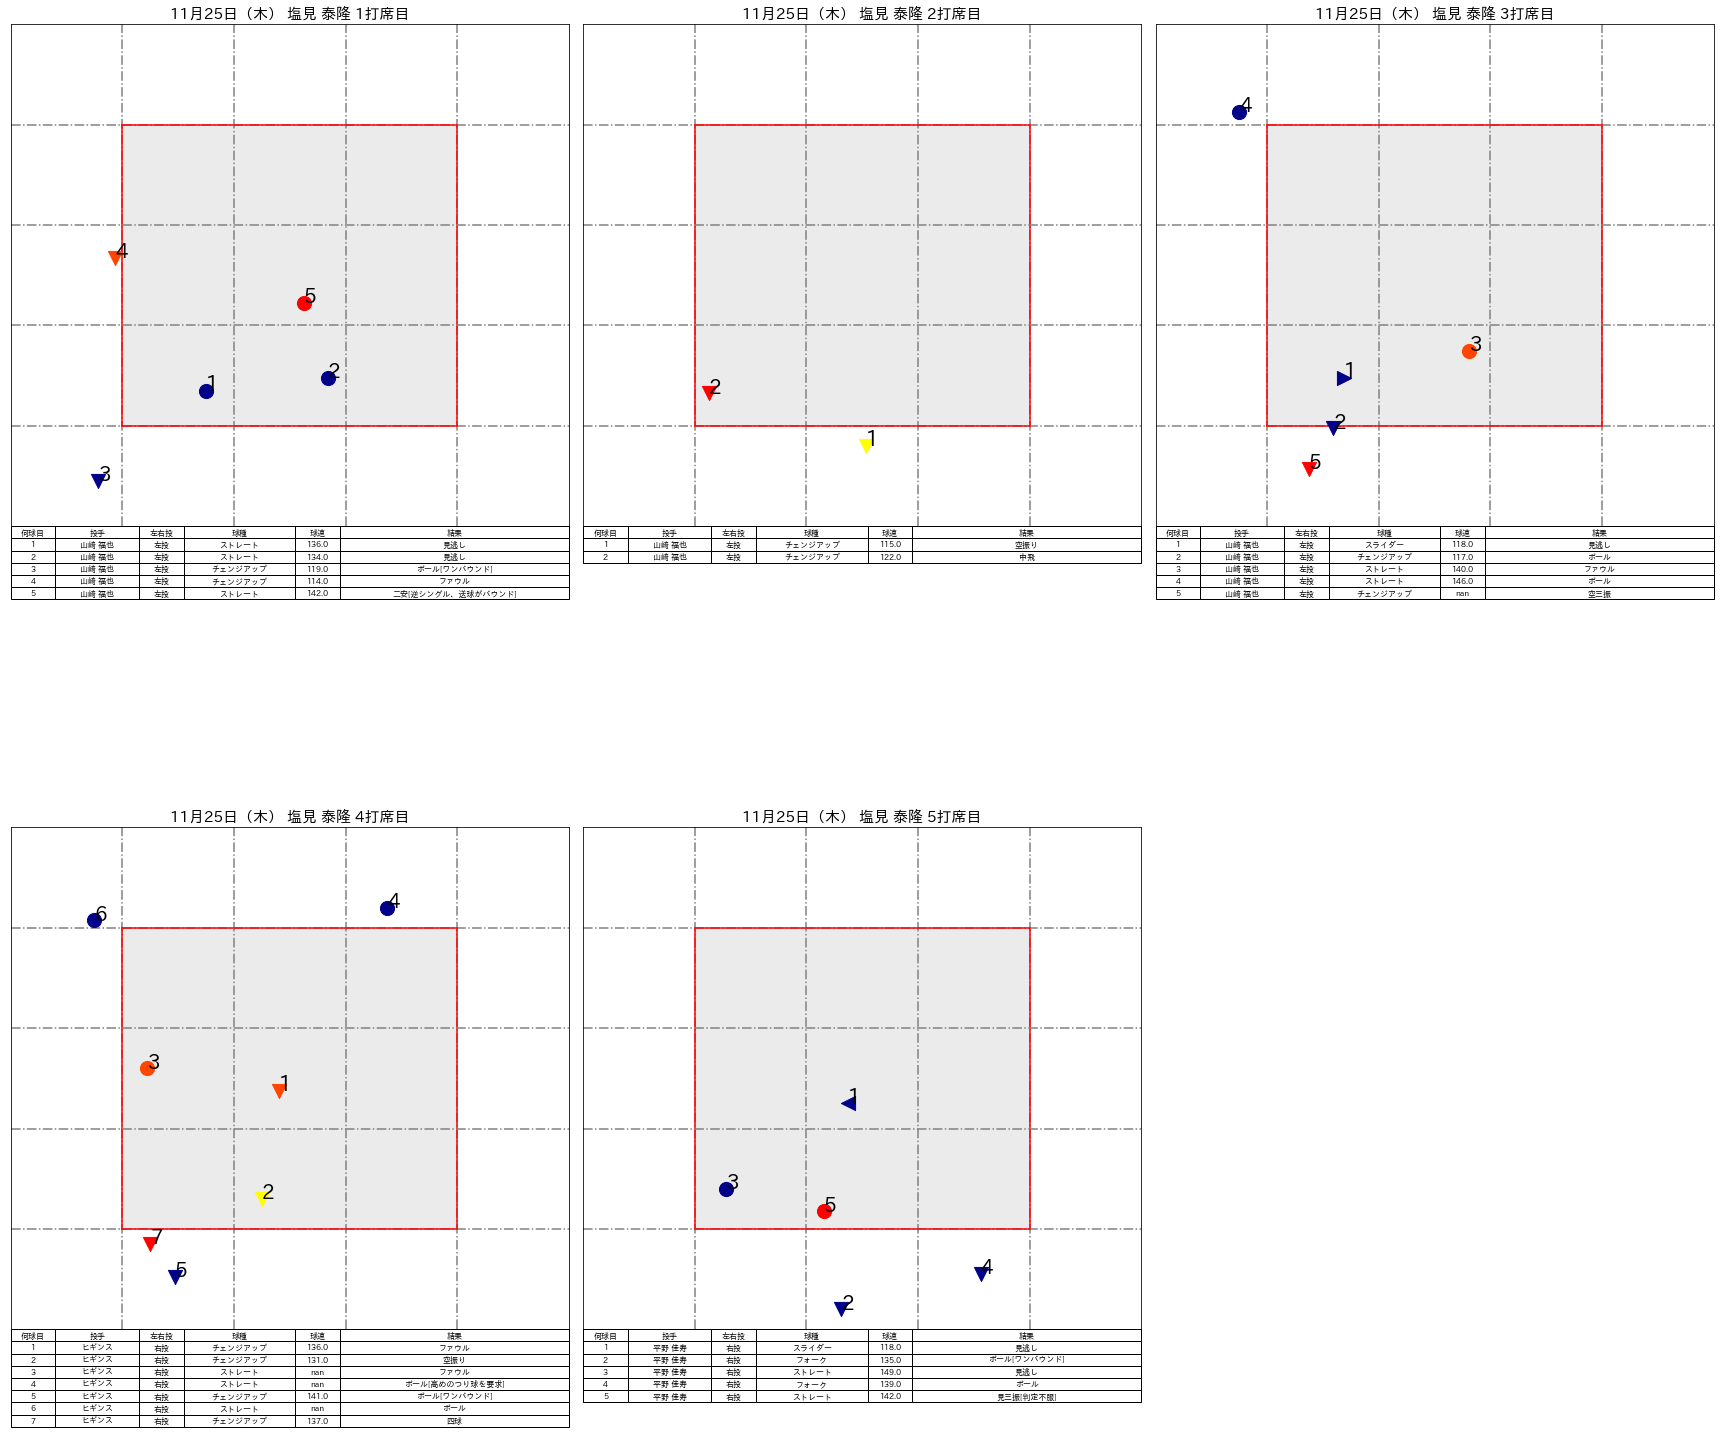

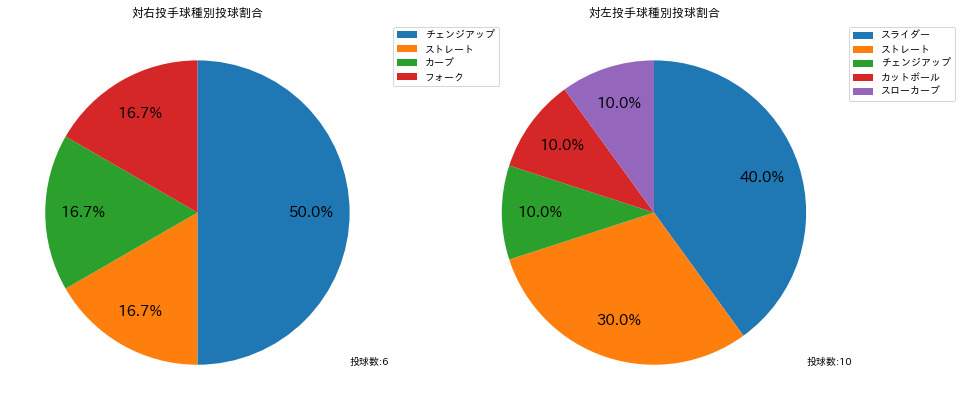

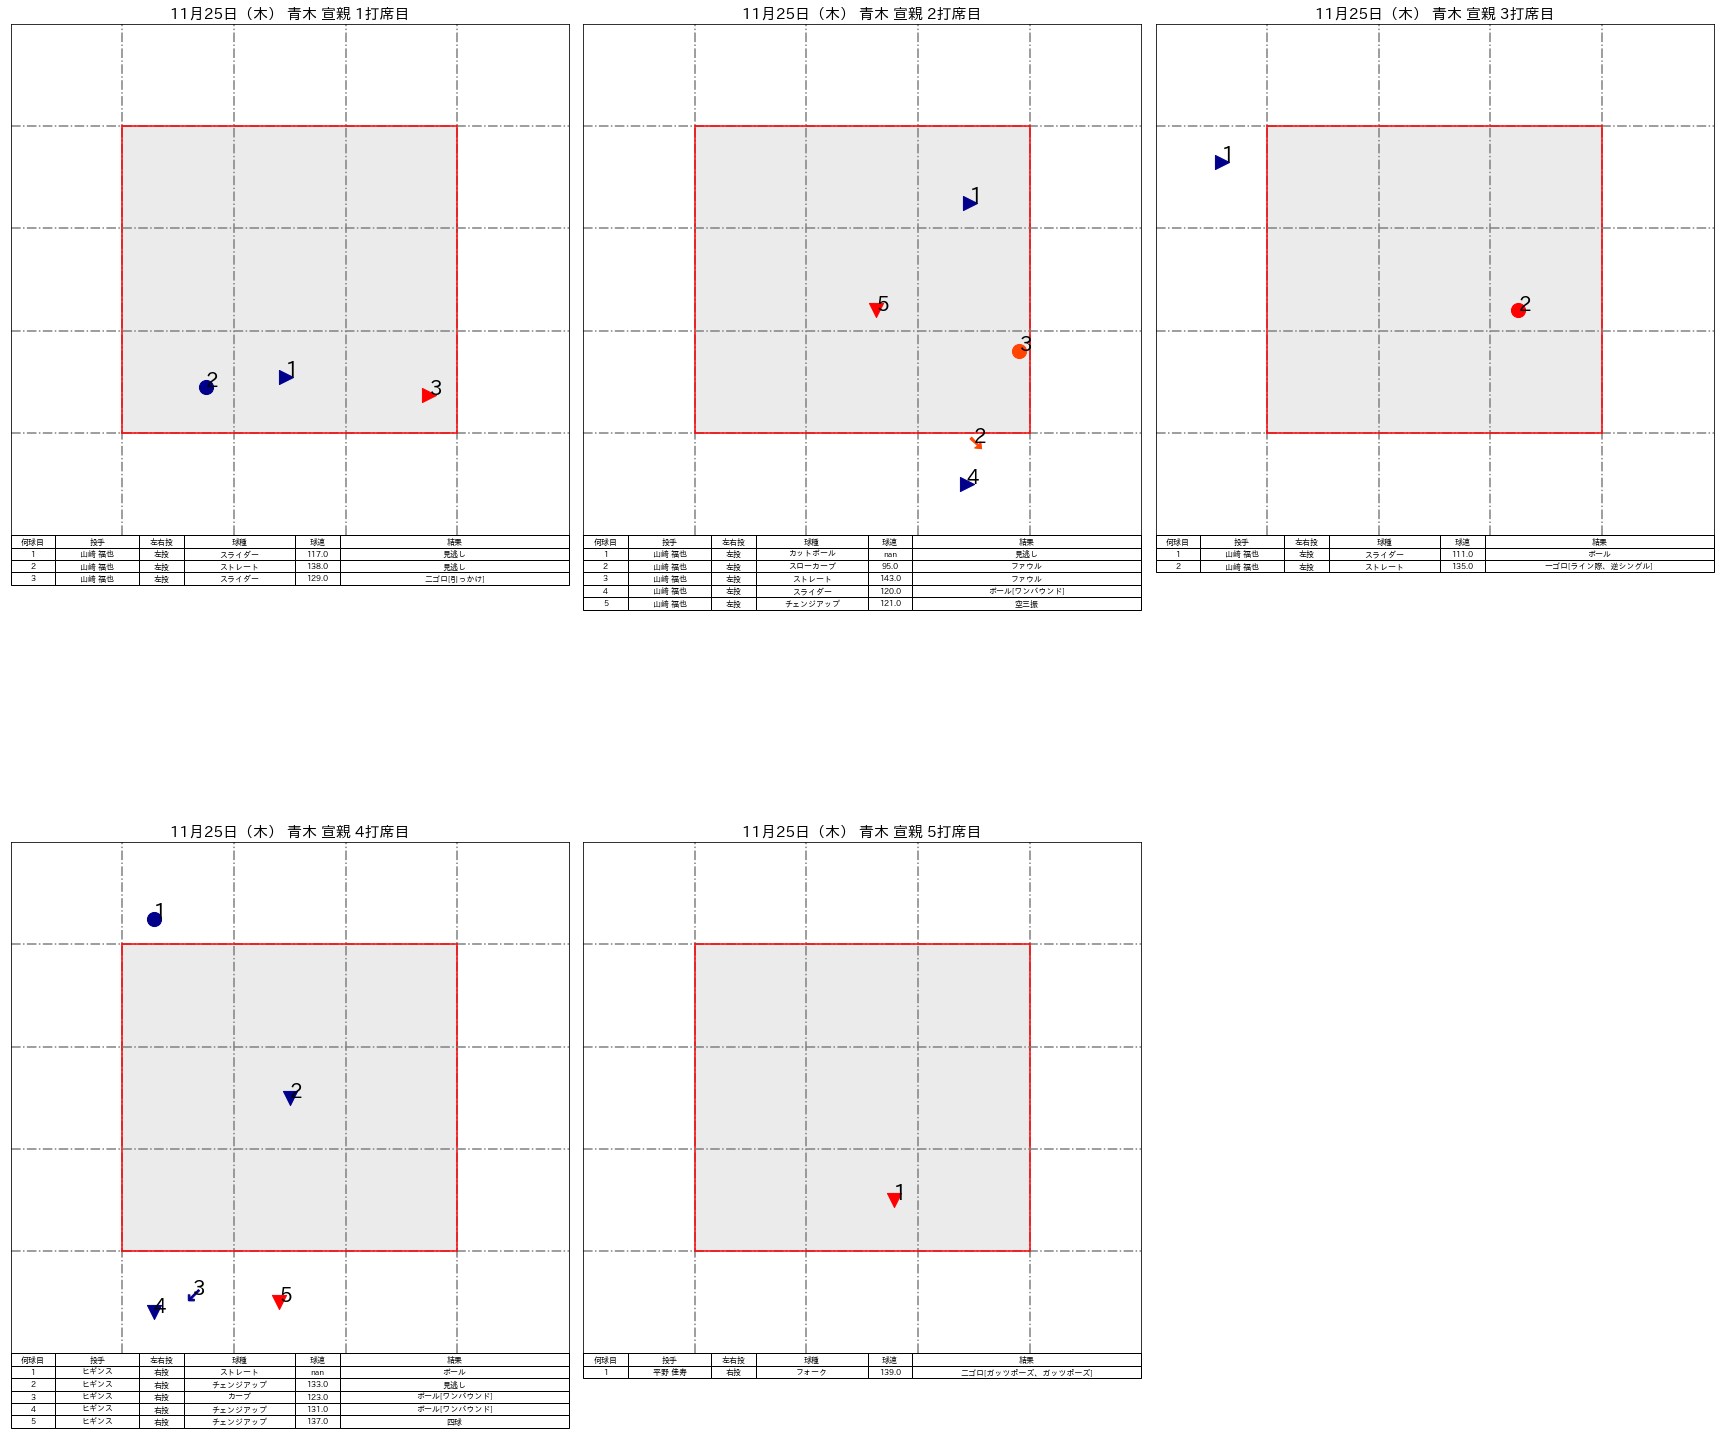

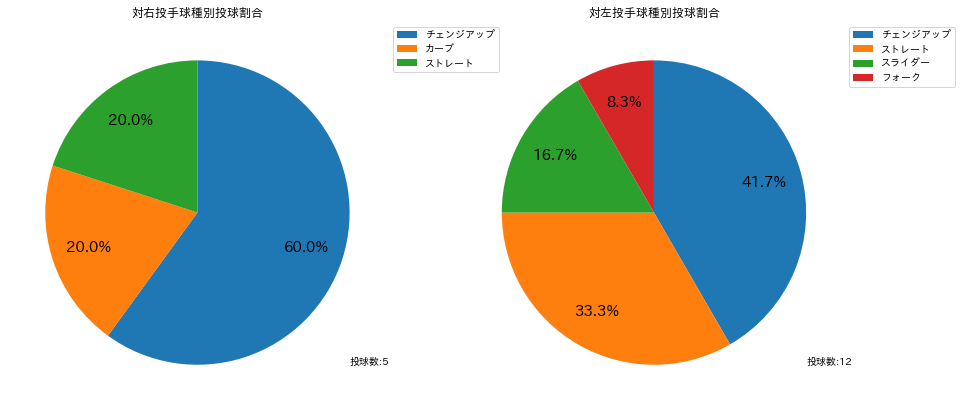

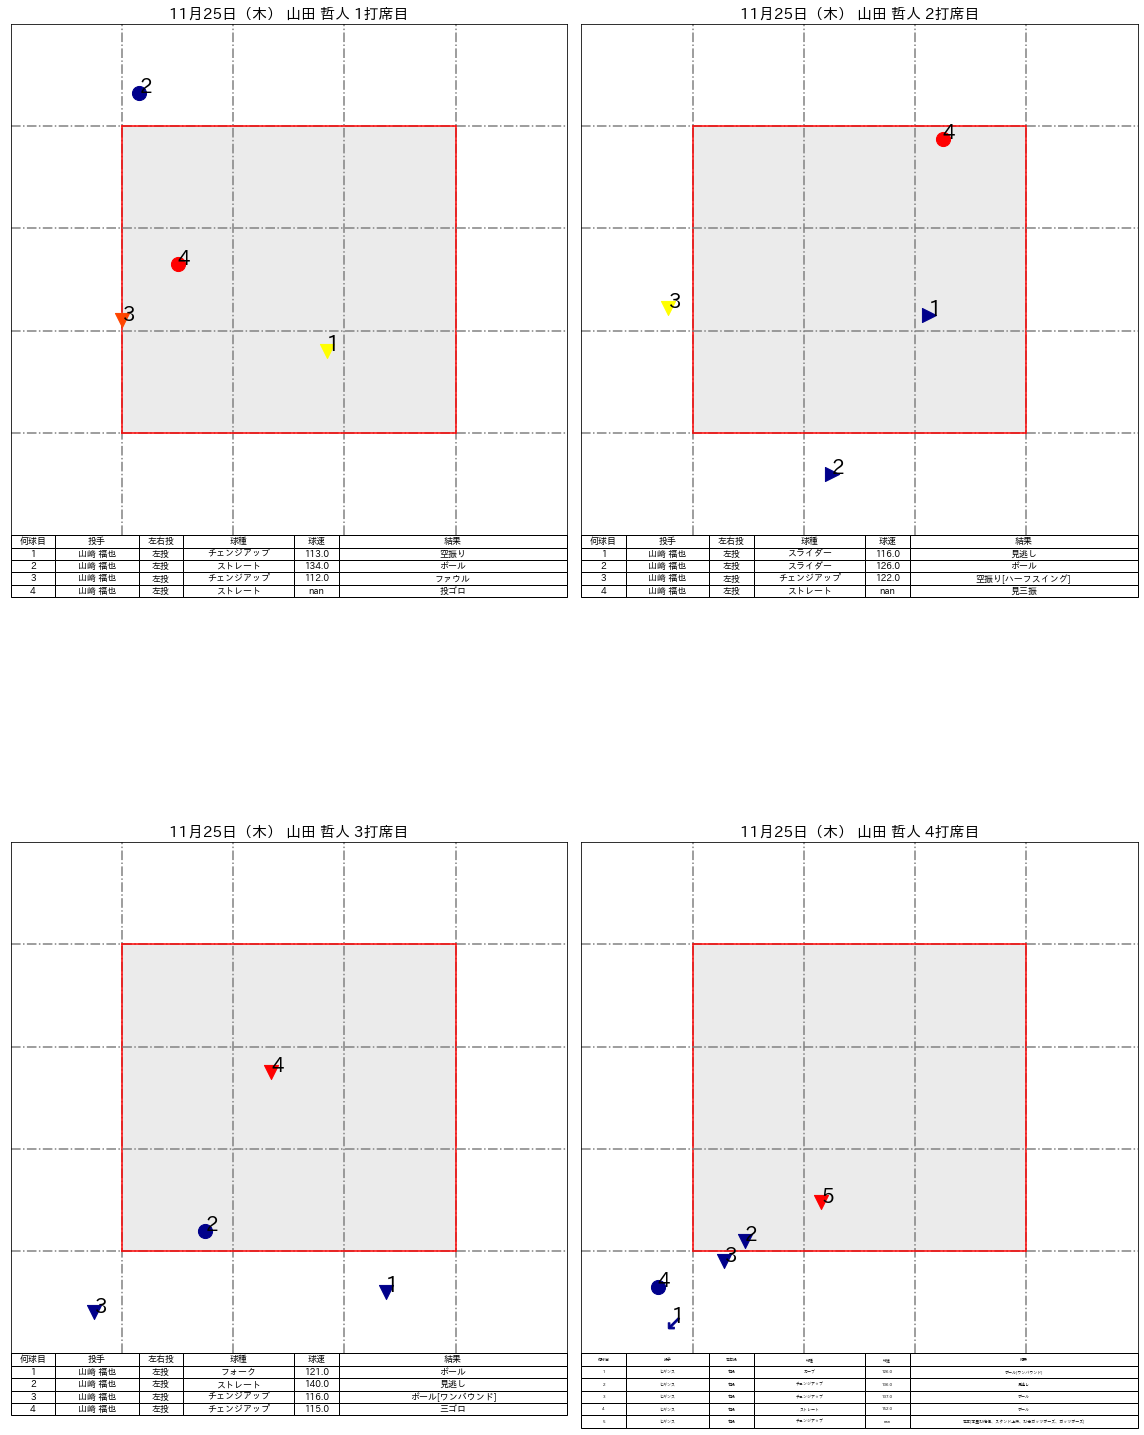

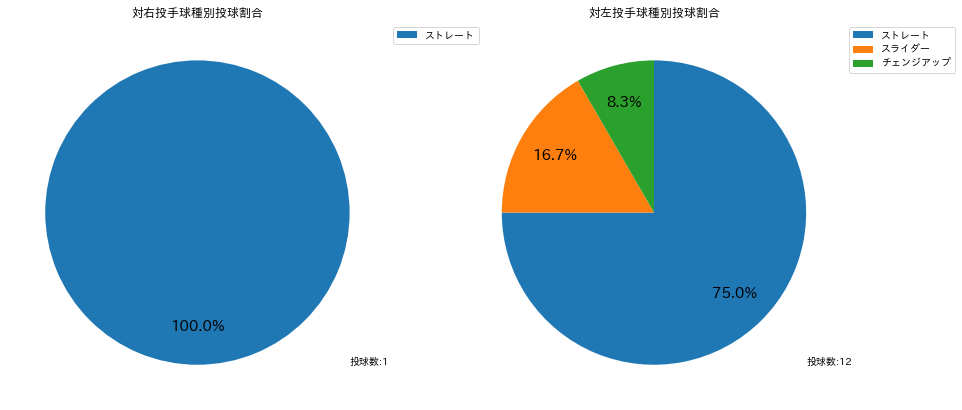

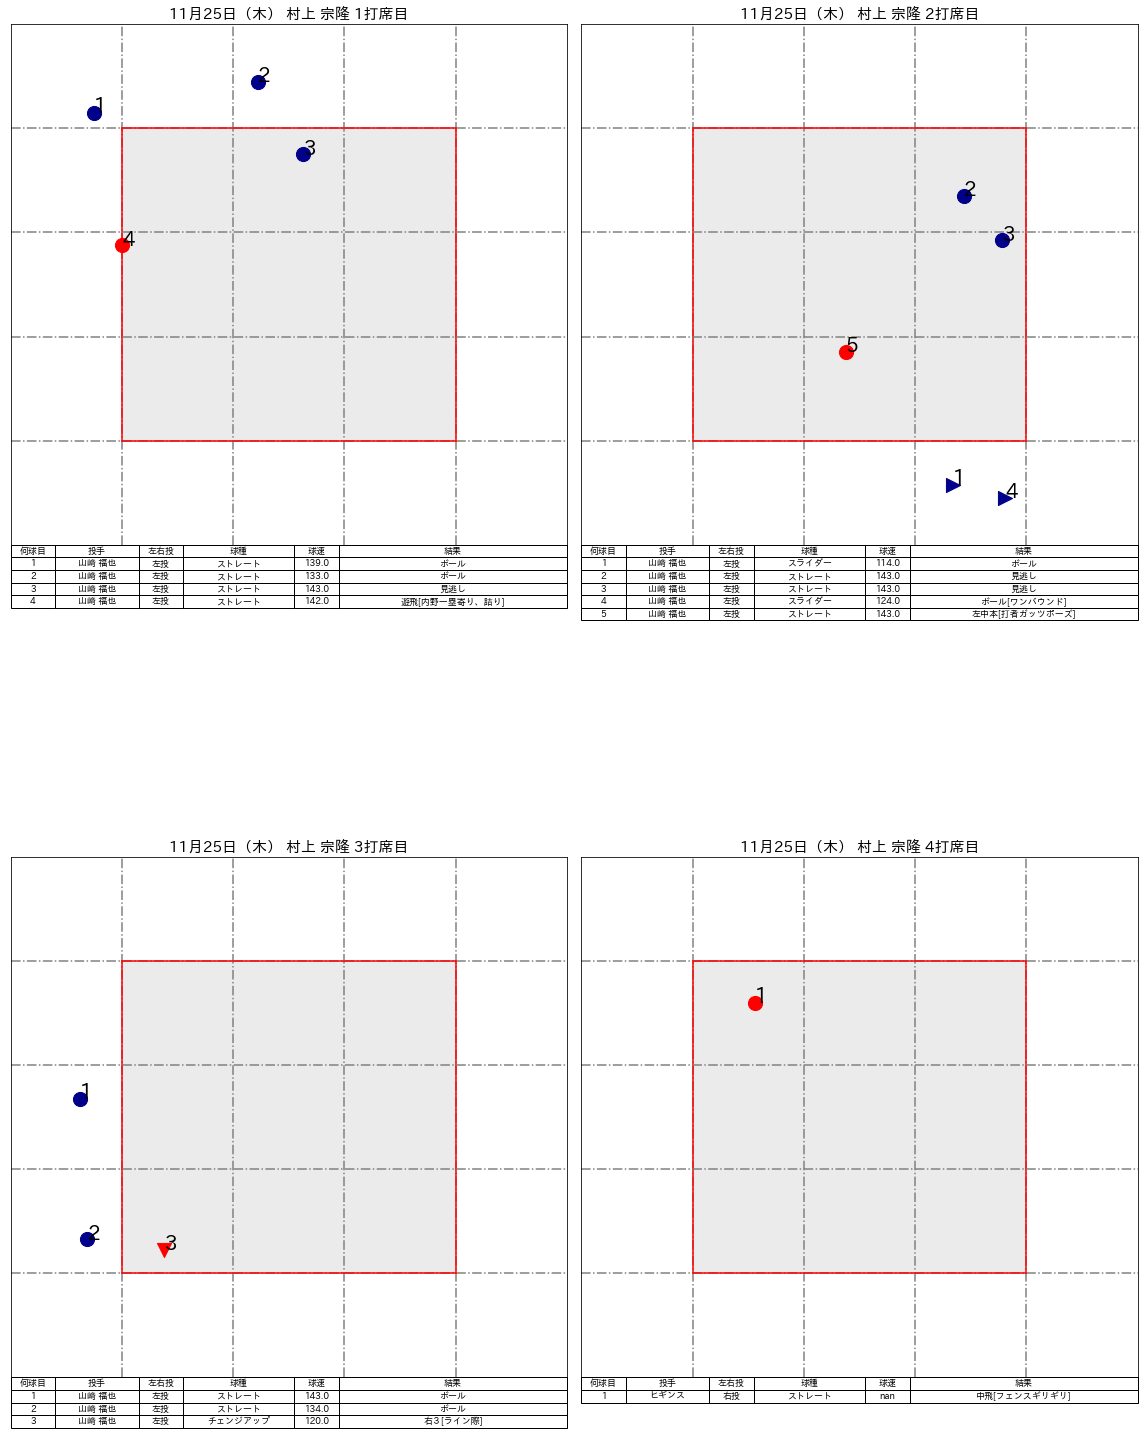

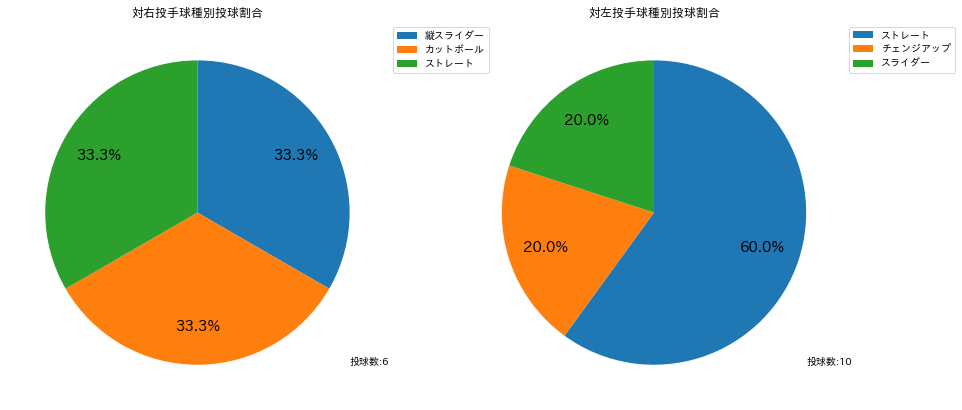

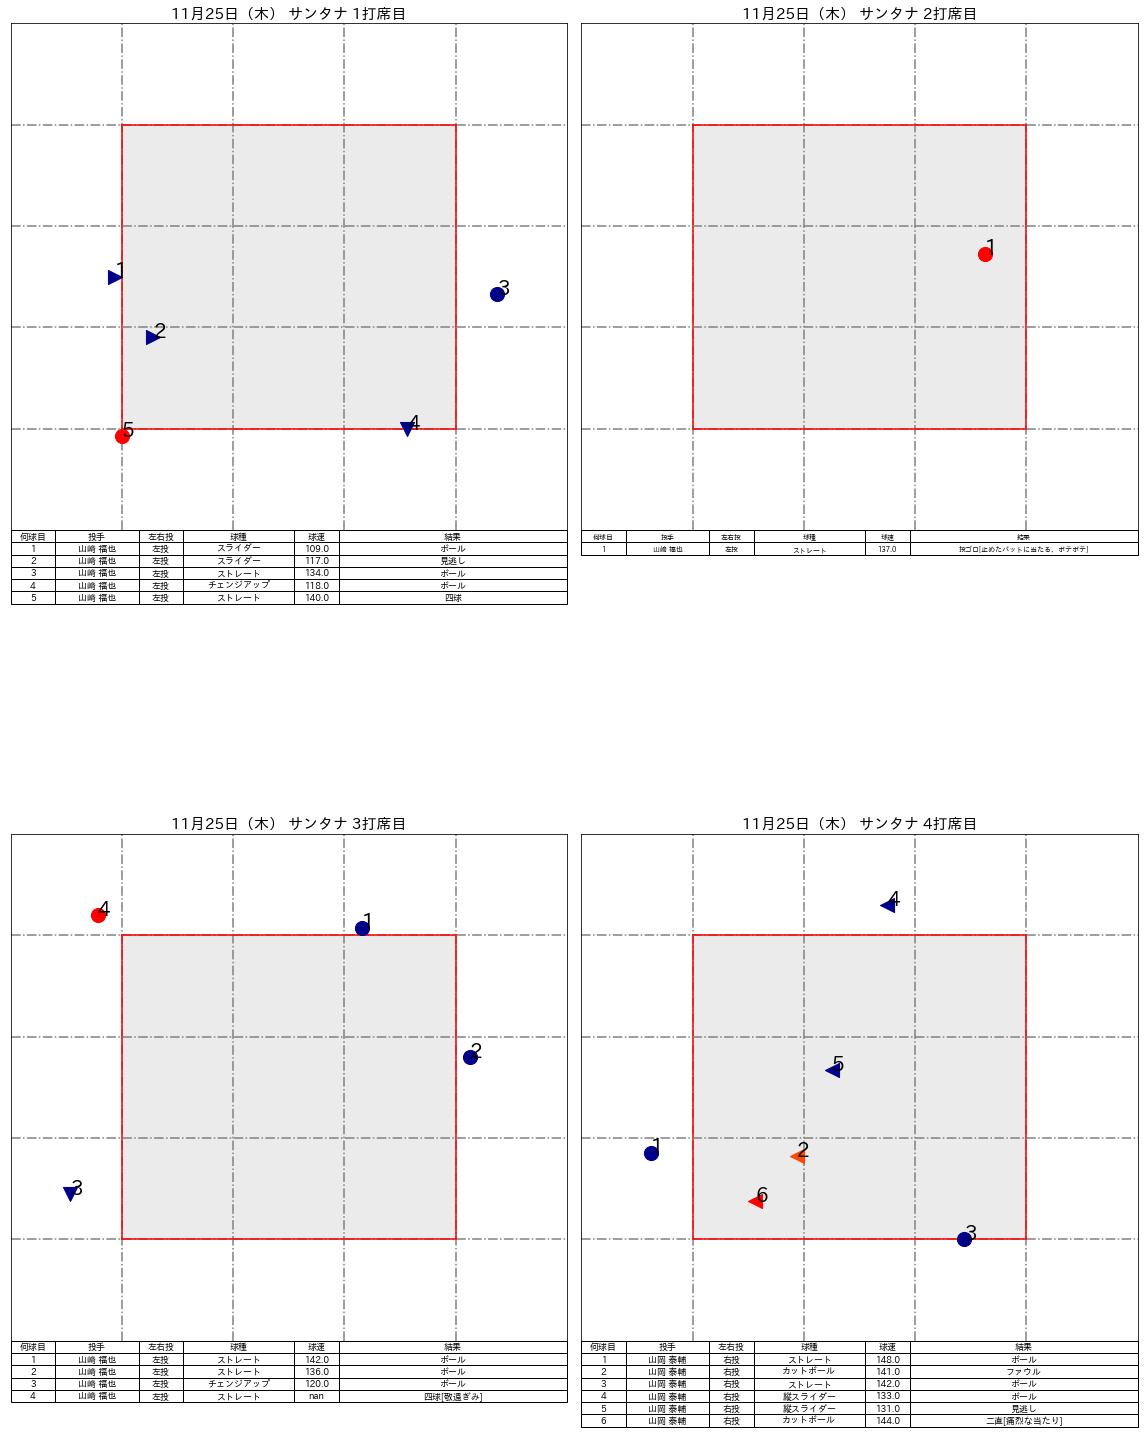

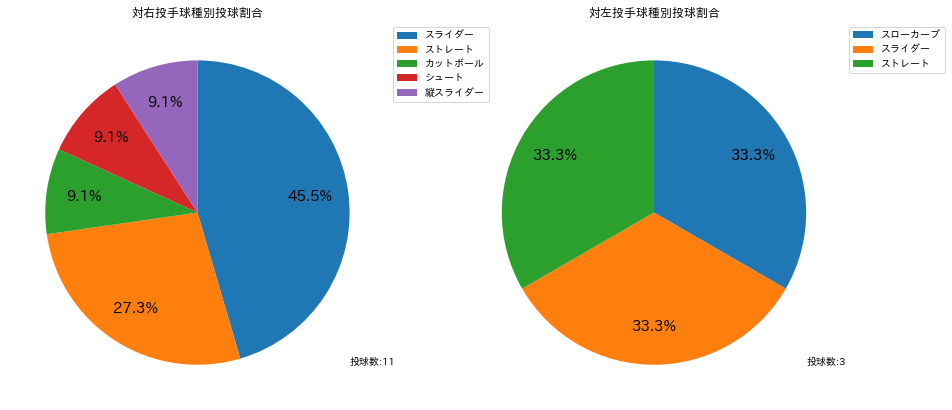

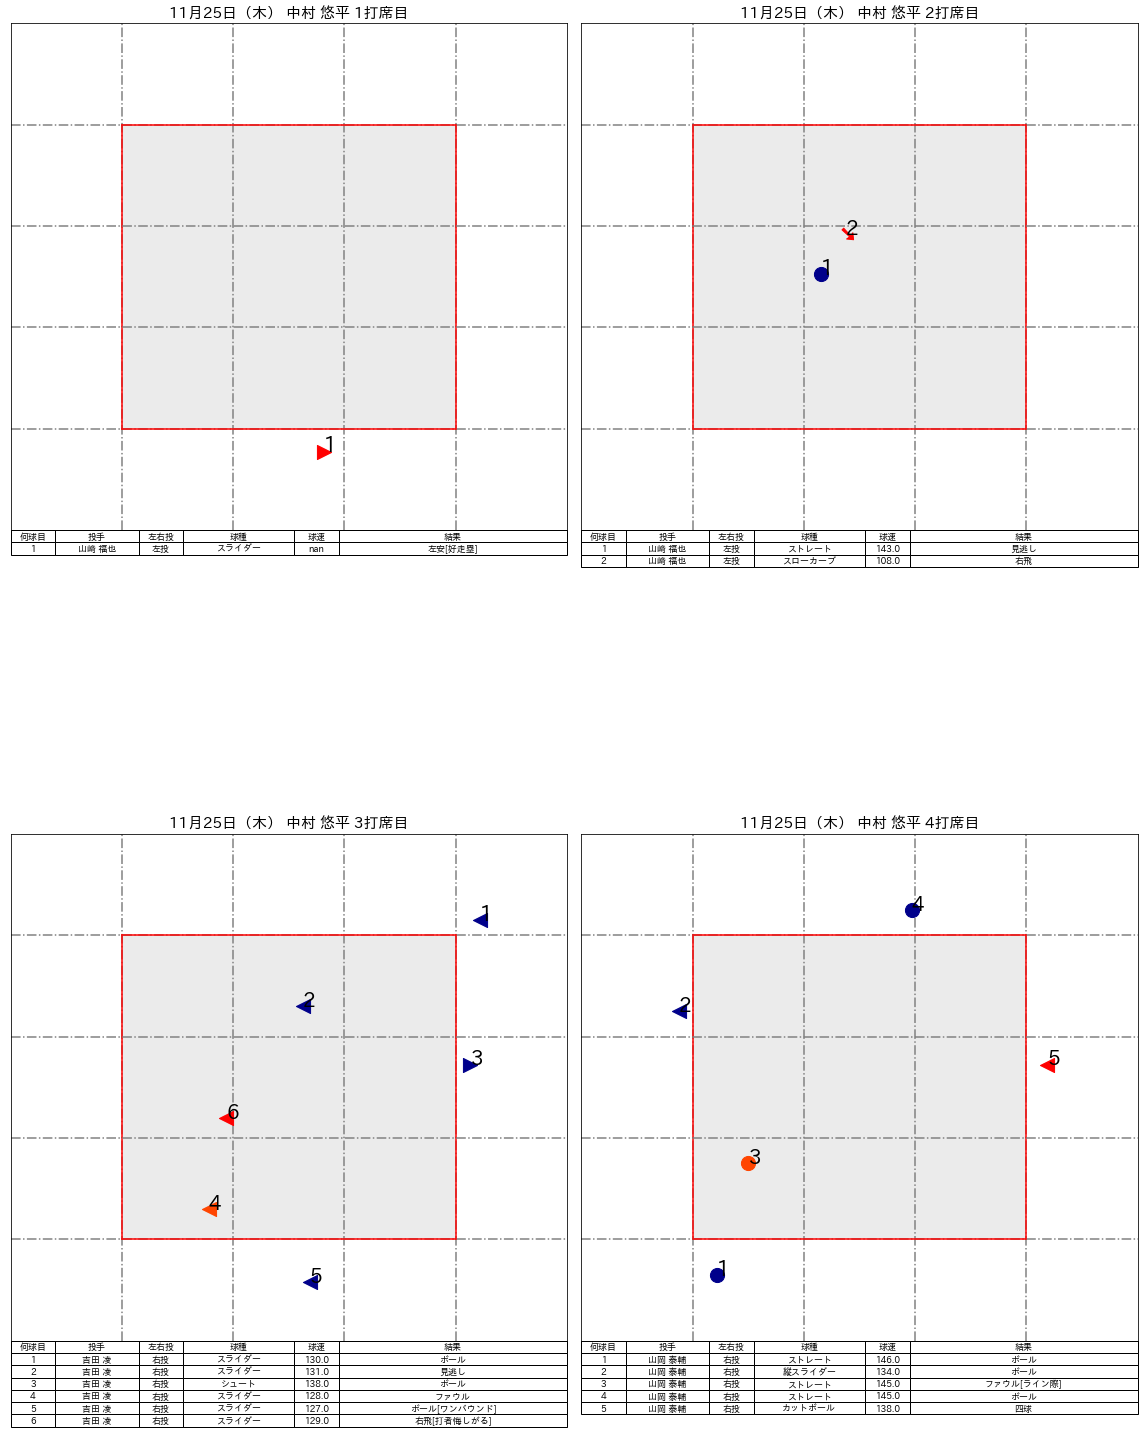

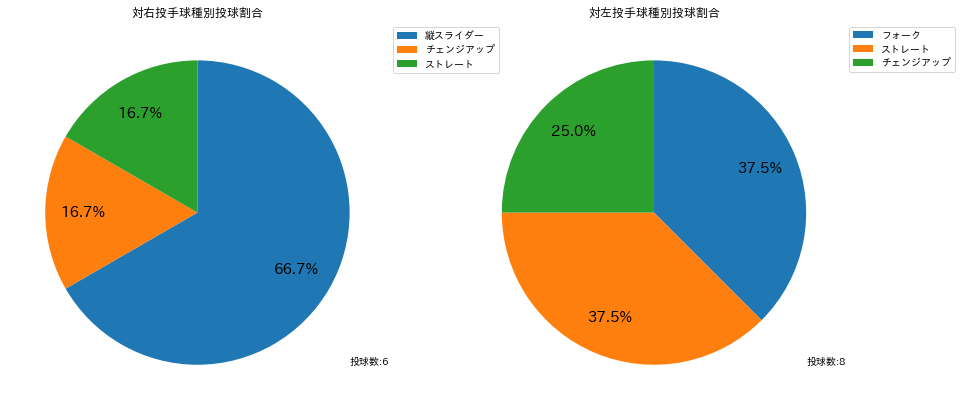

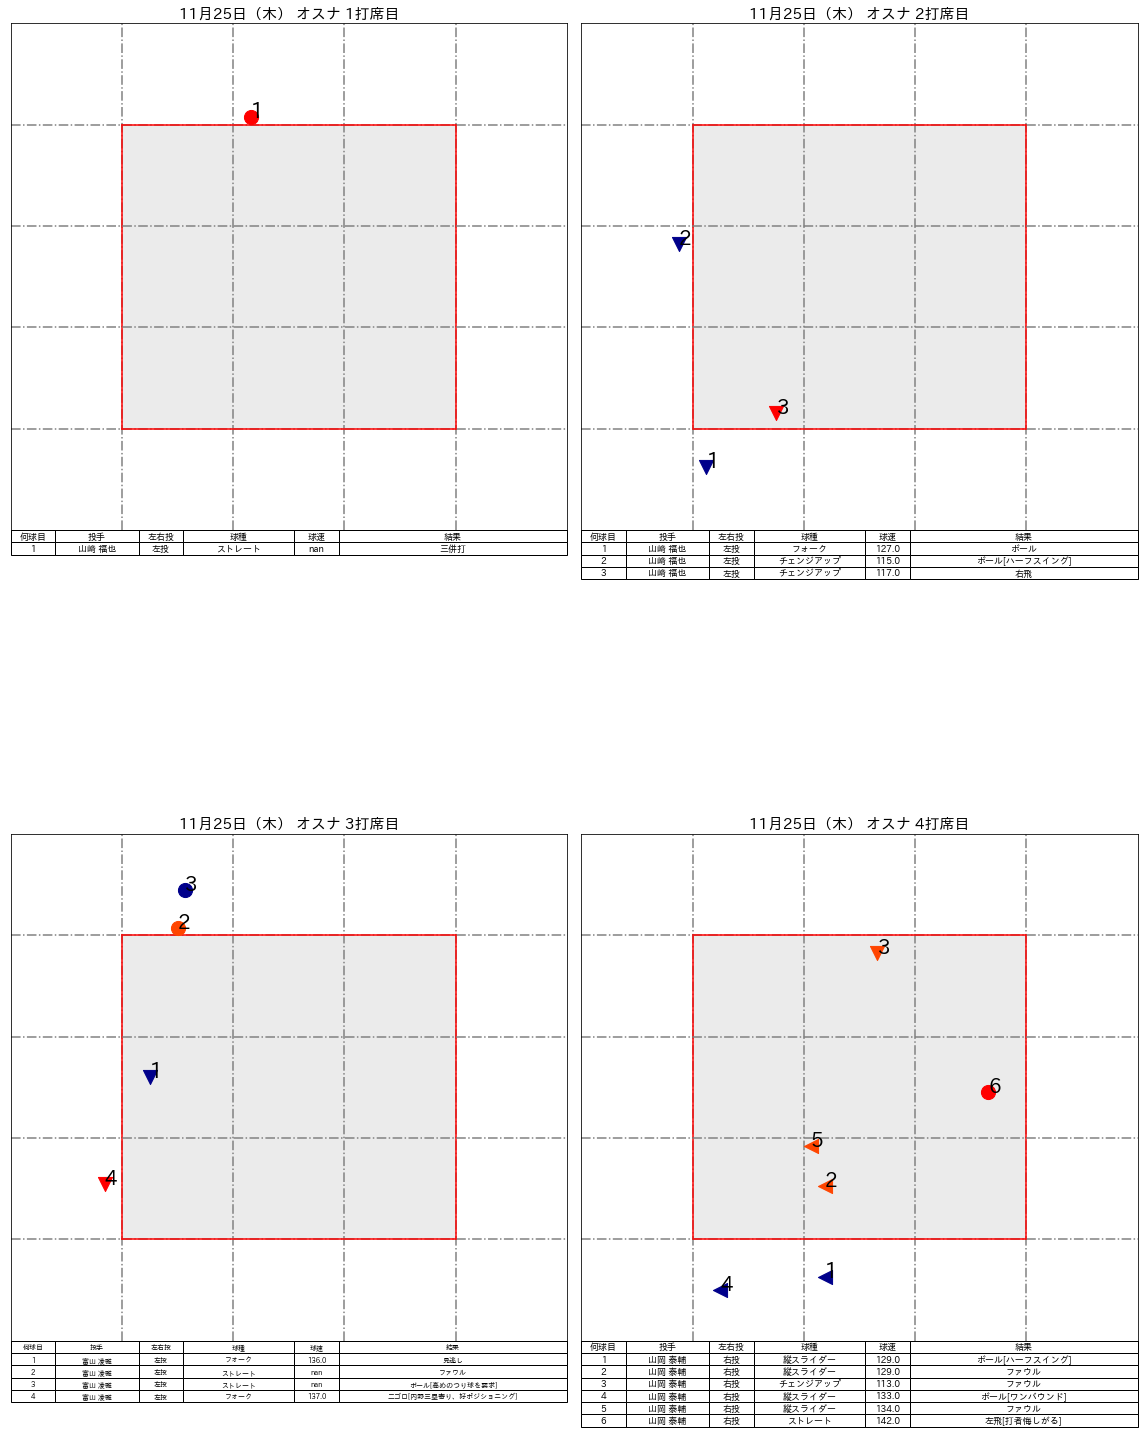

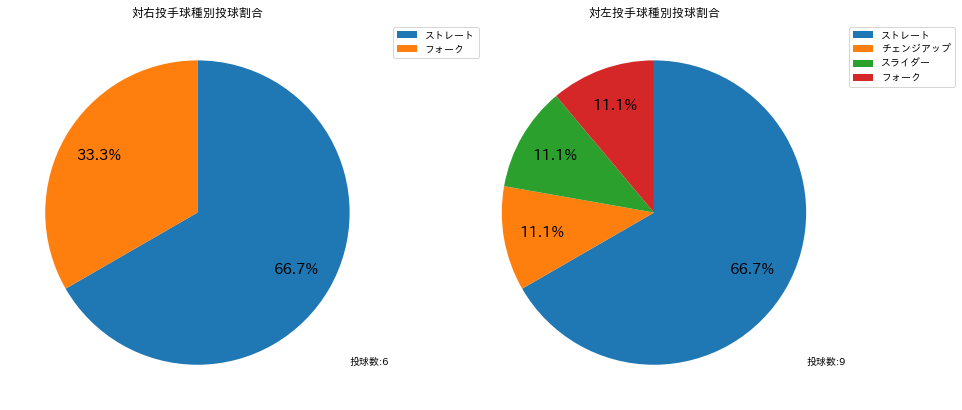

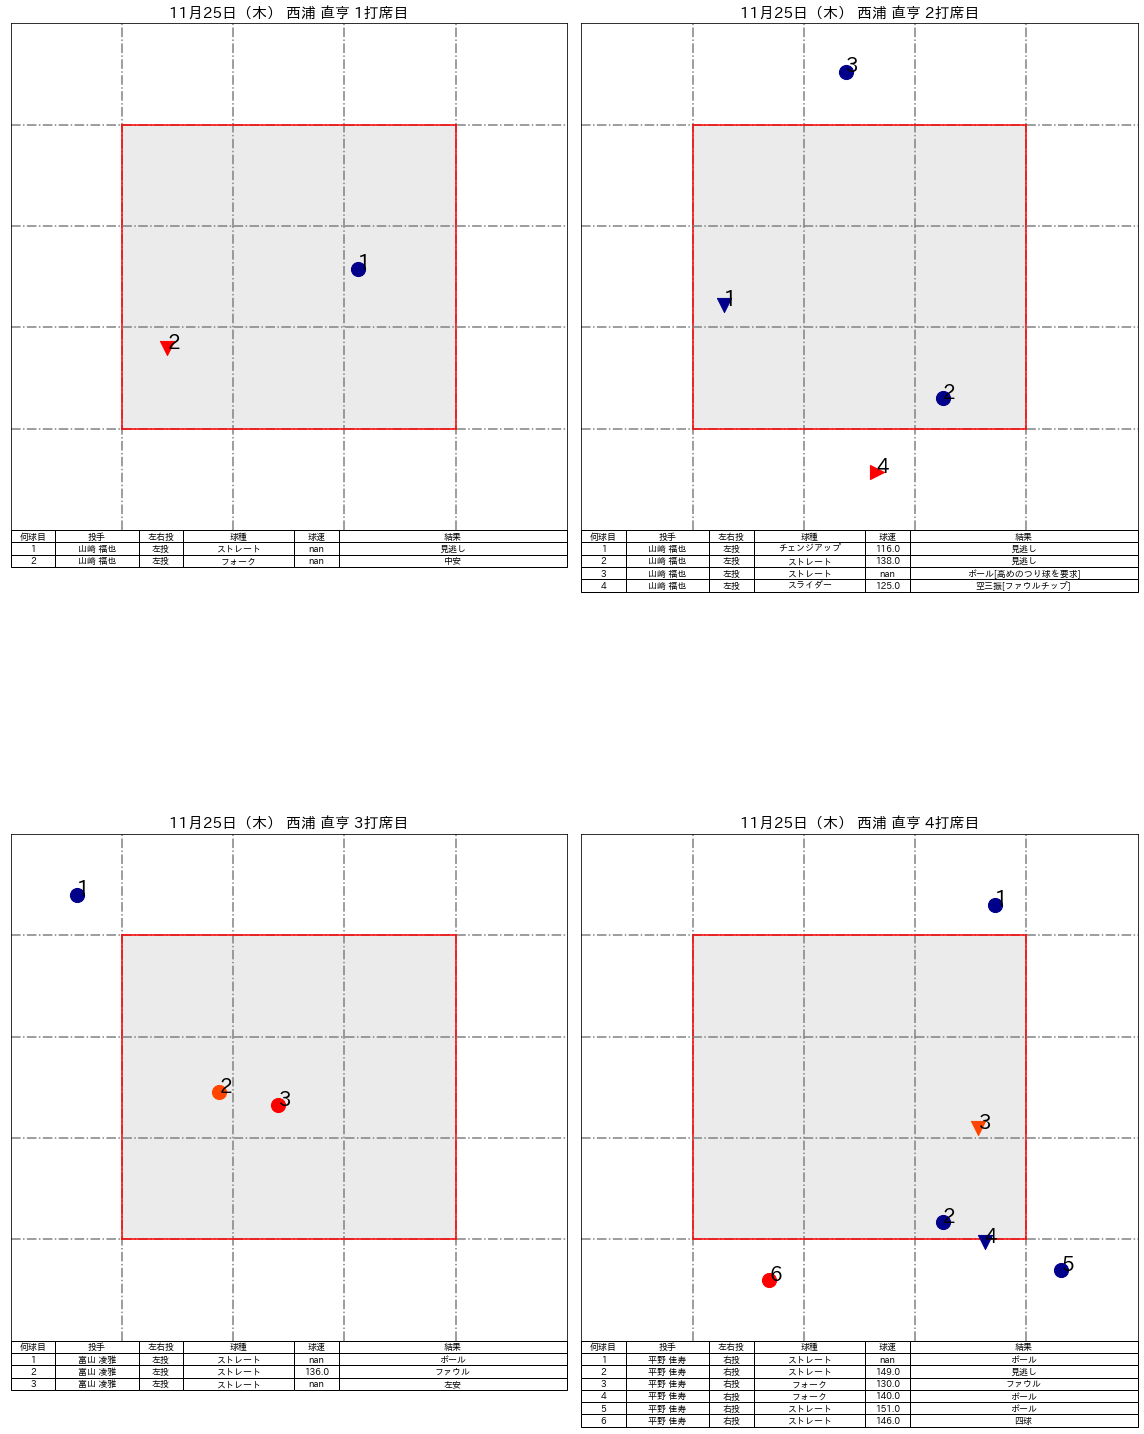

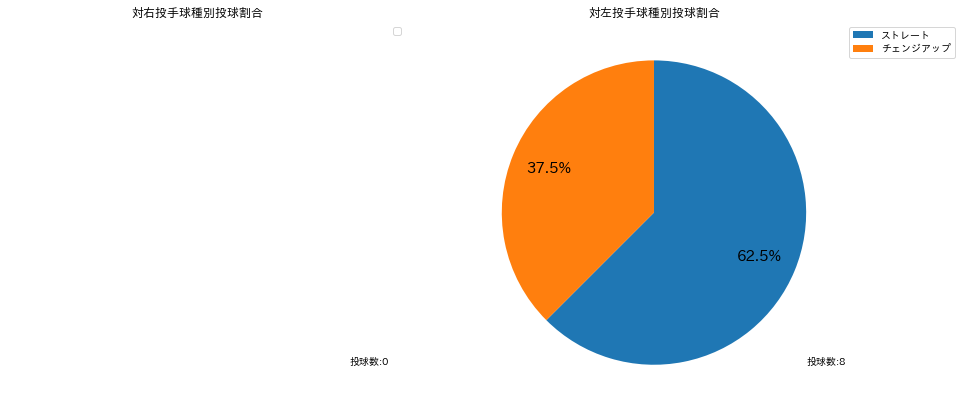

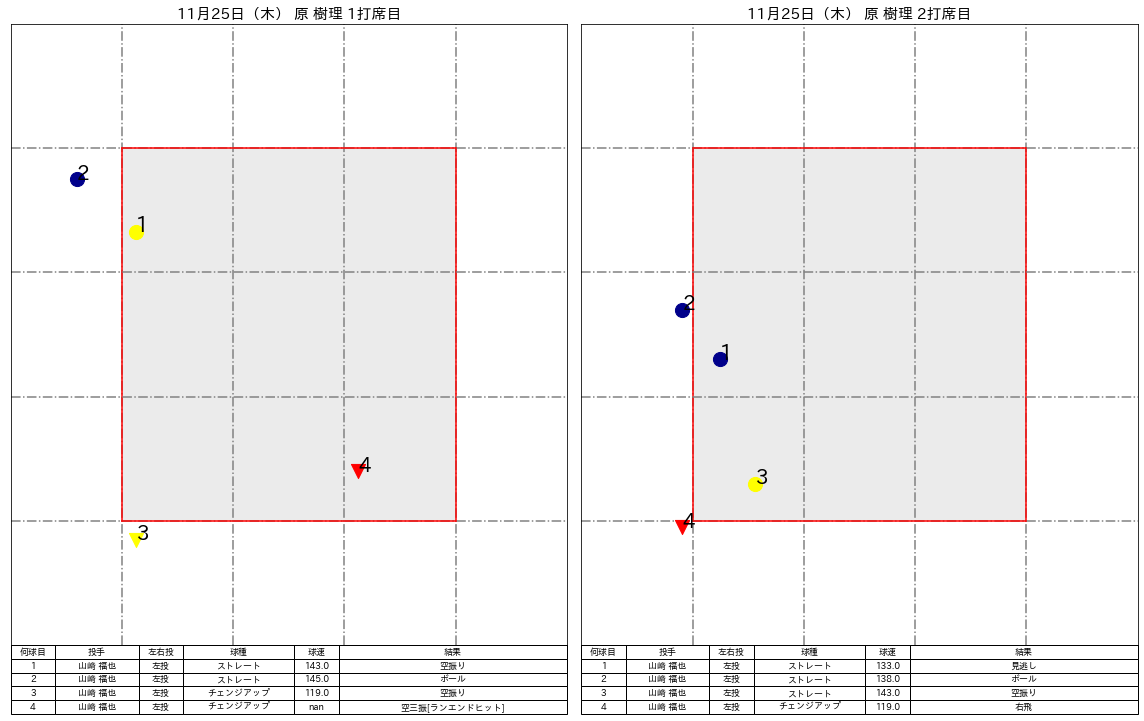

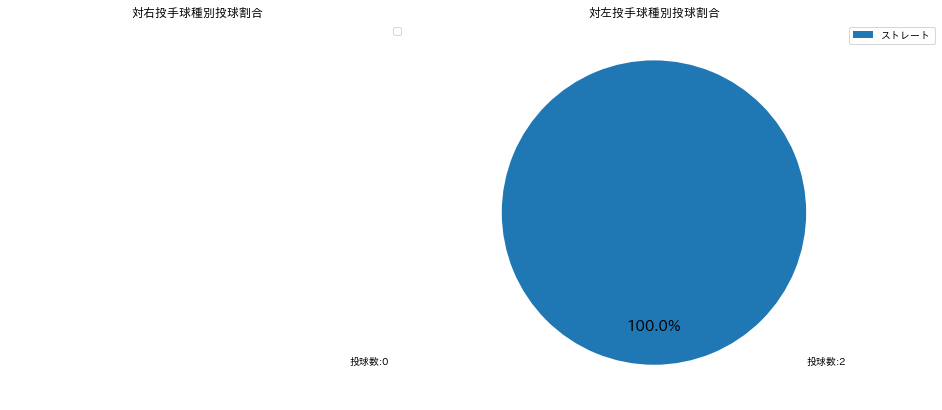

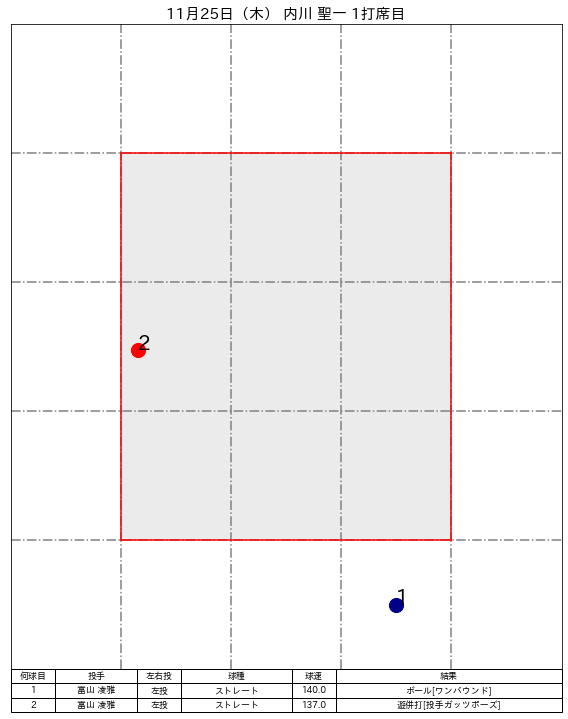

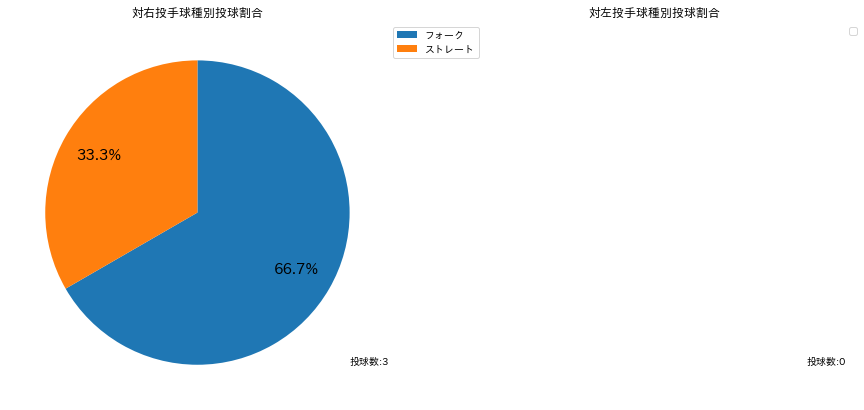

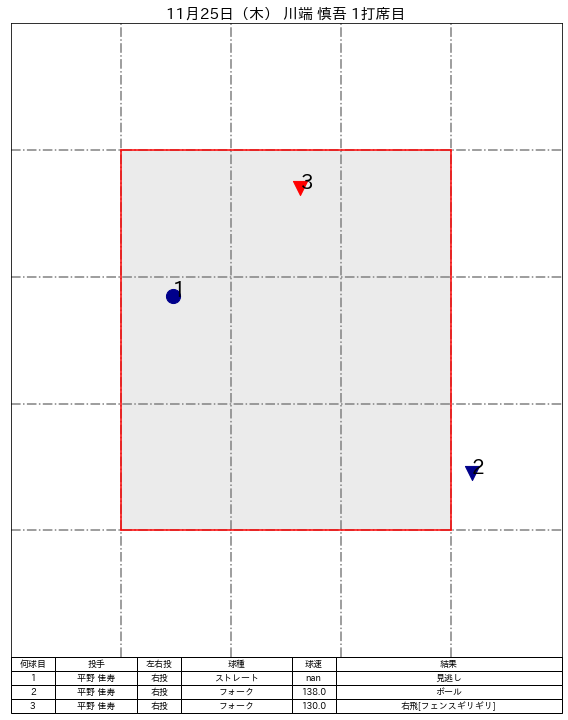

In [6]:
files = glob.glob(file_loadpath)
for bb in range(0, len(files)):
    file = files[bb]
    dfSS = pd.read_excel(file)
    df_B = dfSS[(dfSS['後攻（ホーム）'] == Team) & (dfSS['何回'].str.contains('裏')) | (dfSS['先攻（アウェイ）'] == Team) & (dfSS['何回'].str.contains('表'))]
    
    members_B = df_B['打者名'].unique()
    print(f"{len(members_B)}人")
    
    for mem in range(0, len(members_B)):
        #選手ごと全体成績
        member = members_B[mem]
        _df = df_B[df_B['打者名'] == member]
        _df.reset_index(drop=True, inplace=True)
        df = _df.loc[:,['打席投球数','投手名','左右投','球種','球速','内容']]
        df_c = _df.loc[:,['コース内外','コース高低','打球種類','球種番号','打者名','試合日','コンタクト']]
        BatN = df_c.iat[0,4]#打者名
        Day = df_c.iat[0,5]#試合日

        #球種別割合表示
        fig = plt.figure(figsize=(15, 15))
        fig.patch.set_facecolor('white')

        #対右投
        df_R = _df[_df['左右投'] == '右投']
        P_types = df_R['球種'].value_counts().to_dict()
        label = list(P_types.keys()) #球種
        value = list(P_types.values()) #球種毎投球数

        ax = fig.add_subplot(121,title="対右投手球種別投球割合")
        ax.pie(x=value, autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 15},pctdistance=0.75)
        ax.legend(label,bbox_to_anchor=(1,1), loc='upper left')
        ax.text(1, -1, f"投球数:{sum(value)}")

        #対左投
        df_L = _df[_df['左右投'] == '左投']
        P_types = df_L['球種'].value_counts().to_dict()
        label = list(P_types.keys()) #球種
        value = list(P_types.values()) #球種毎投球数

        ax = fig.add_subplot(122,title="対左投手球種別投球割合")
        ax.pie(x=value, autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 15},pctdistance=0.75)
        ax.legend(label,bbox_to_anchor=(1,1), loc='upper left')
        ax.text(1, -1, f"投球数:{sum(value)}")
        
        os.makedirs(f"画像/{BatN}/球種割合" , exist_ok=True)
        fig.savefig(f"画像/{BatN}/球種割合/{BatN} {Day}.jpg")
        
        
        
        listz = [-1]
        atBatP = df_c.index[df_c['打球種類'] != 0].tolist() #打席の最終球のインデックス番号
        roop = len(atBatP) #何打席か

        BatP = listz + atBatP #スライスに使う数字

        #打席数によって、大きさを変える
        if roop == 1:
            subp = [111]
            hor = 1
            vert = 1
        elif roop == 2:
            subp = [121,122]
            hor = 2
            vert = 1
        elif roop == 3:
            subp = [221,222,223]
            hor = 2
            vert = 2
        elif roop == 4:
            subp = [221,222,223,224]
            hor = 2
            vert = 2
        elif roop == 5:
            subp = [231,232,233,234,235]
            hor = 3
            vert = 2
        elif roop == 6:
            subp = [231,232,233,234,235,236]
            hor = 3
            vert = 2

        fig = plt.figure(figsize=(8*hor, 10*vert))
        fig.patch.set_facecolor('white')

        result = []
        for num in range(roop):
            BatR = f'{num+1}打席目:{df.iat[atBatP[num],5]}'
            result.append(BatR)
            ax = fig.add_subplot(subp[num],title=f"{Day} {BatN} {num+1}打席目")
            ax.title.set_size(15)
            #x軸設定
            ax.set_xlim(0, 160)
            ax.set_xticks([])
            x_v = [32,64,96,128]
            for i in range(len(x_v)):
                ax.axvline(x_v[i], ls = "-.", color = guide_c)
                if i == 0 or i == 3:
                    ax.axvline(x_v[i], color = strike_c,ymin=0.2, ymax=0.8)

            #y軸設定
            ax.set_yticks([])
            ax.set_ylim(200, 0)
            y_h = [40,80,120,160]
            for j in range(len(y_h)):
                ax.axhline(y_h[j], ls = "-.", color = guide_c)
                if j == 0 or j == 3:
                    ax.axhline(y_h[j], color = strike_c,xmin=0.2, xmax=0.8)

            #ストライクゾーン内の色設定
            r = patches.Rectangle( (32,40) , 96, 120, facecolor=strike_z_c,alpha=0.3)
            ax.add_patch(r)

            ball = 0

            for num2 in range(BatP[num]+1,BatP[num+1]+1):
                ball += 1
                #投手の投げ手
                hand = df.iat[num2,2]
                #投手の投げ手による変化球の違い
                if hand == '右投':
                    balltype = hand_R
                else:
                    balltype = hand_L
                #打席のi+1球目の座標
                x = df_c.iat[num2,0]
                y = df_c.iat[num2,1]
                bt = df_c.iat[num2,3]
                co = df_c.iat[num2,6]
                
                if num2 != BatP[num+1]:
                    ax.annotate(ball, xy=(x,y), size=20 ,zorder = 10)
                    ax.scatter(x, y, c = Contact[co][1] , marker = balltype[bt][1], s=200, zorder = 5)
                else:
                    ax.annotate(ball, xy=(x,y), size=20 ,zorder = 10)
                    ax.scatter(x, y, c = 'r', marker = balltype[bt][1], s=200, zorder = 5)

            ax.table(cellText=df[BatP[num]+1:BatP[num+1]+1].values,colLabels=Column_labels,colWidths=[0.08,0.15,0.08,0.2,0.08,0.41],cellLoc='center',)

        plt.tight_layout()
        plt.subplots_adjust(hspace=0.6)
        os.makedirs(f"画像/{BatN}/投球内容" , exist_ok=True)
        fig.savefig(f"画像/{BatN}/投球内容/{BatN} {Day}.jpg")
        
        # OAuth認証 セッションを開始
        twitter = OAuth1Session(APIK, APIKS, AT, ATS)

        # 画像投稿
        files1 = {"media" : open(f"画像/{BatN}/球種割合/{BatN} {Day}.jpg", 'rb')}
        req_media1 = twitter.post(url_media, files = files1)

        # レスポンスを確認
        if req_media1.status_code != 200:
            print ("画像アップデート失敗: %s", req_media.text)
            exit()

        # Media ID を取得
        media_id1 = json.loads(req_media1.text)['media_id']
            
        # OAuth認証 セッションを開始
        twitter = OAuth1Session(APIK, APIKS, AT, ATS)

        # 画像投稿
        files2 = {"media" : open(f"画像/{BatN}/投球内容/{BatN} {Day}.jpg", 'rb')}
        req_media2 = twitter.post(url_media, files = files2)

        # レスポンスを確認
        if req_media2.status_code != 200:
            print ("画像アップデート失敗: %s", req_media.text)
            exit()

        # Media ID を取得
        media_id2 = json.loads(req_media2.text)['media_id']

        # Media ID を付加してテキストを投稿
        params = {'status': f'{Day}日本シリーズ {BatN}\n{result}\n#プロ野球 #swallows', "media_ids": f"{media_id1},{media_id2}"}
        req_media = twitter.post(url_text, params = params)

        # 再びレスポンスを確認
        if req_media.status_code != 200:
            print ("テキストアップデート失敗: %s", req_text.text)
            exit()

        print (f"{mem+1}人目OK")
        
#seibulions #Seibulions_summary

In [ ]:
#seibulions #Seibulions_summary